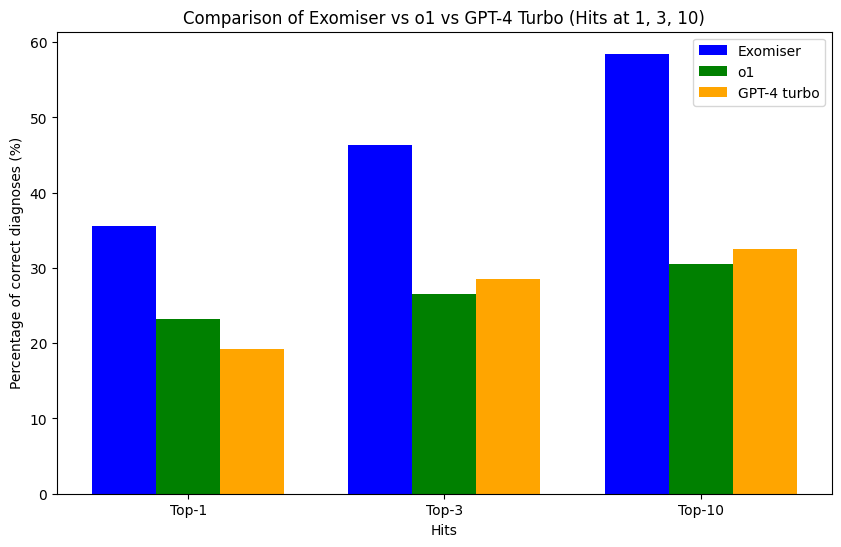

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_hits_comparison(exomiser_file, gpt_o1_file, gpt_4_file, output_plot):
    # Read the three result files
    exomiser_df = pd.read_csv(exomiser_file, sep='\t')
    gpt_o1_df = pd.read_csv(gpt_o1_file, sep='\t')
    gpt_4_df = pd.read_csv(gpt_4_file, sep='\t')

    # Get total number of cases (for calculating percentages)
    total_files_exomiser = exomiser_df[['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'nf']].sum(axis=1)[0]
    total_files_gpt_o1 = gpt_o1_df[['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'nf']].sum(axis=1)[0]
    total_files_gpt_4 = gpt_4_df[['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'nf']].sum(axis=1)[0]

    # Extract relevant hit percentages (ignoring lang column for Exomiser)
    exomiser_hits = [
        exomiser_df['n1'][0] / total_files_exomiser * 100,
        exomiser_df[['n1', 'n2', 'n3']].sum(axis=1)[0] / total_files_exomiser * 100,  # Top 3
        exomiser_df[['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10']].sum(axis=1)[0] / total_files_exomiser * 100  # Top 10
    ]

    gpt_o1_hits = [
        gpt_o1_df['n1'][0] / total_files_gpt_o1 * 100,
        gpt_o1_df[['n1', 'n2', 'n3']].sum(axis=1)[0] / total_files_gpt_o1 * 100,  # Top 3
        gpt_o1_df[['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10']].sum(axis=1)[0] / total_files_gpt_o1 * 100  # Top 10
    ]
    
    gpt_4_hits = [
        gpt_4_df['n1'][0] / total_files_gpt_4 * 100,
        gpt_4_df[['n1', 'n2', 'n3']].sum(axis=1)[0] / total_files_gpt_4 * 100,  # Top 3
        gpt_4_df[['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10']].sum(axis=1)[0] / total_files_gpt_4 * 100  # Top 10
    ]

    # Define labels and values
    labels = ['Top-1', 'Top-3', 'Top-10']
    x = range(len(labels))  # X positions for labels

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    
    width = 0.25  # Width of the bars
    plt.bar(x, exomiser_hits, width=width, label='Exomiser', color='blue', align='center')
    plt.bar([i + width for i in x], gpt_o1_hits, width=width, label='o1', color='green', align='center')  # Stylized 'o1'
    plt.bar([i + 2*width for i in x], gpt_4_hits, width=width, label='GPT-4 turbo', color='orange', align='center')

    # Add labels, title, and legend
    plt.xlabel('Hits')
    plt.ylabel('Percentage of correct diagnoses (%)')
    plt.title('Comparison of Exomiser vs o1 vs GPT-4 Turbo (Hits at 1, 3, 10)')
    plt.xticks([i + width for i in x], labels)
    plt.legend()

    # Save and display the plot
    plt.savefig(output_plot)
    plt.show()

# Example usage in a Jupyter notebook:
exomiser_file = "../outputdir_all_2024_07_04/plots/topn_result_exomiser.tsv"
gpt_o1_file = "../outputdir_all_2024_07_04/plots/topn_result_gpt_o1.tsv"
gpt_4_file = "../outputdir_all_2024_07_04/plots/topn_result.tsv"
output_plot = "../outputdir_all_2024_07_04/plots/comparison_exomiser_vs_o1_vs_gpt_4.png"

# Call the function to generate the comparison plot
plot_hits_comparison(exomiser_file, gpt_o1_file, gpt_4_file, output_plot)
